# VIX index analysis

In this notebook we demonstrate some possibilities of VIX index ("fear index") analysis. We use [Quandl](https://www.quandl.com/data/CBOE/VIX-Volatility-Index) close daily data from January 2004 till present day (May 2017). This study answers the following questions:

<ul>
<li> What is the distribution of VIX values among intervals</li>
<li> What is the conditional distribution of VIX returns along specified time horizon given current VIX value</li>
<li> What is the expected payoff of vanilla options on VIX, conditional on current VIX value?</li>
</ul>

In [1]:
import pandas as pd
import fin_indices as fi
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Distribution of VIX values among intervals

In [2]:
# create a generic VIX object
vix = fi.Vix()

# print out general information
close = vix.df.close
mi = close.min()
ma = close.max()
ami = close.argmin()
ama = close.argmax()
fs = 'Minimum value {0:5.2f} attained at {1}, maximum value {2:5.2f} attained at {3}'
print(fs.format(mi, ami, ma, ama))

3364 observations from 2004-01-02 to 2017-05-12 read
Minimum value  9.77 attained at 2017-05-08, maximum value 80.86 attained at 2008-11-20


In [3]:
# plotting function
def show_freq(int_len = 5):
    """ """
    vix.make_intervals_col(int_len)
    vix.df.intervals.value_counts().plot(kind='barh')
    xlabel('Value frequency')
    ylabel('Interval')
    ti = title('Frequency of VIX values')

### Interval length 5

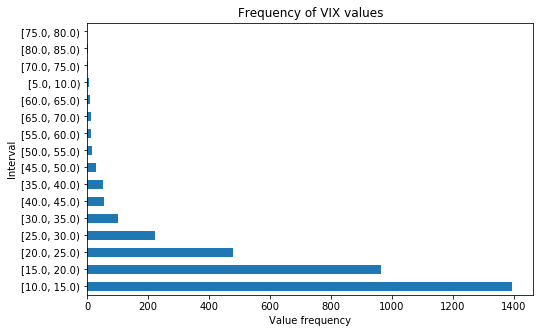

In [4]:
figsize(8,5)
show_freq(int_len=5)

### Interval length 10

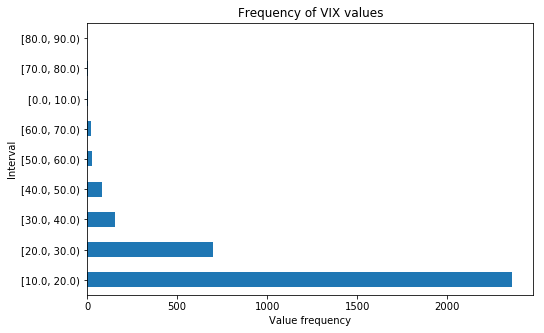

In [5]:
figsize(8,5)
show_freq(int_len=10)

## Computing distribution of returns over specified horizons

### Create a Vix object with sample returns over a few specified horizons

In [6]:
# define horizons in days for analysis
hors = [15, 30, 45, 60]

# create a VIX object
vix = fi.Vix(hors=hors)

3364 observations from 2004-01-02 to 2017-05-12 read


### Define a plotting function

In [7]:
# ploting CDFs
def plot_cdfs(dfo, inte):
    """ make one plot of all cdfs in the dataframe dfo """
    for cl in dfo.columns:
        plot(dfo[cl], label='{0} days'.format(cl[(cl.find('_') + 1):]))
    legend()
    xlabel('VIX return, %')
    ylabel('Probability')
    ti = title('CDFs of VIX returns starting at {0}'.format(inte))

### Plot unconditional distributions of returns over prespecified horizons

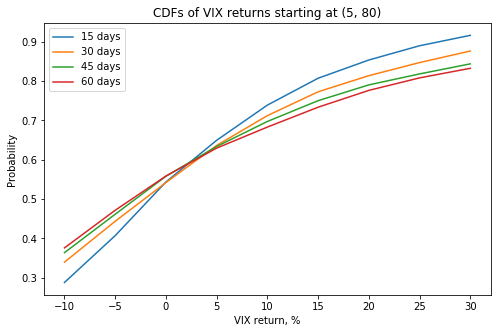

In [8]:
figsize(8, 5)

# define a sequence of VIX return values (as percentage) for CDF calculation
x = [-10, -5, 0, 5, 10, 15, 20, 25, 30]

# starting interval for VIX values
inte = (5, 80)

# compute CDFs
dfo = vix.cdfs(x, interval=inte)

plot_cdfs(dfo, inte)

### Numeric values

In [9]:
print(dfo.round(3))

           close_15  close_30  close_45  close_60
return, %                                        
-10           0.288     0.339     0.363     0.376
-5            0.407     0.443     0.461     0.471
 0            0.543     0.542     0.558     0.559
 5            0.650     0.637     0.634     0.630
 10           0.739     0.712     0.698     0.683
 15           0.808     0.773     0.750     0.734
 20           0.854     0.814     0.791     0.777
 25           0.890     0.847     0.819     0.808
 30           0.917     0.877     0.844     0.833


The data is interpreted as follows. We have a value 0.288 in row '-10' and column 'close_15'; this means that with probability 0.288 the VIX value would fall at least by 10% in 15 business days. The value 0.542 in row '0' column 'close_30' means that with probability 0.542 it would fall in 30 business days. The value 0.808 in row '25' column 'close_60' means that with probability 1 - 0.808 = 0.192 the VIX index would rise by at least 25% in 60 business days. All the probabilities are <b>unconditional</b>.

## Different initial conditions (starting values)

The probabilistic behavior of VIX clearly depends on its current value. Say, if it equals to 10.5, then most likely it would rise in the near future. Similarly, it the value of VIX is extremely high, say, 30, then most likely it would fall soon. We present a number of cumulative distribution function estimates, given current VIX value resides in a relatively narrow interval.

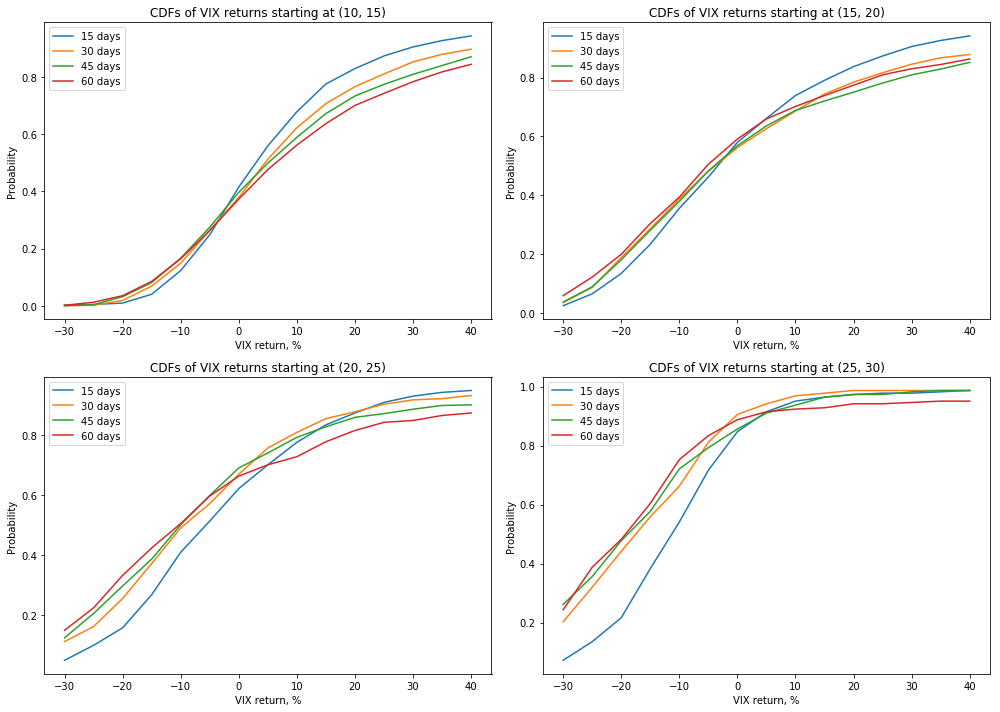

In [10]:
figsize(14, 10)

# define a sequence of VIX return values (as percentage) for CDF calculation
x = np.linspace(-30, 40, 15)

# compute and plot CDFs
subplot(2,2,1)
inte = (10, 15)
plot_cdfs(vix.cdfs(x, interval=inte), inte)
subplot(2,2,2)
inte = (15, 20)
plot_cdfs(vix.cdfs(x, interval=inte), inte)
subplot(2,2,3)
inte = (20, 25)
plot_cdfs(vix.cdfs(x, interval=inte), inte)
subplot(2,2,4)
inte = (25, 30)
plot_cdfs(vix.cdfs(x, interval=inte), inte)
tight_layout()

### Another grouping

It is also worth grouping the plots by horizon. Let's do that.

In [11]:
# define plotting function
def plot_cdf_hor(dfo, hor):
    """ """
    for cl in cls:
        plot(dfo[cl], label=cl)
    legend()
    ti = title('CDF of returns in {0} days horizon'.format(hor))

In [12]:
# reorganize cdf columns
cls = ['10_15', '15_20', '20_25', '25_30']
dfos = [vix.cdfs(x, interval=(10, 15)),
        vix.cdfs(x, interval=(15, 20)),
        vix.cdfs(x, interval=(20, 25)),
        vix.cdfs(x, interval=(25, 30))]
dfd = [pd.concat([df['close_{0}'.format(hor)] for df in dfos], axis=1) for hor in hors]
for df in dfd:
    df.columns=cls

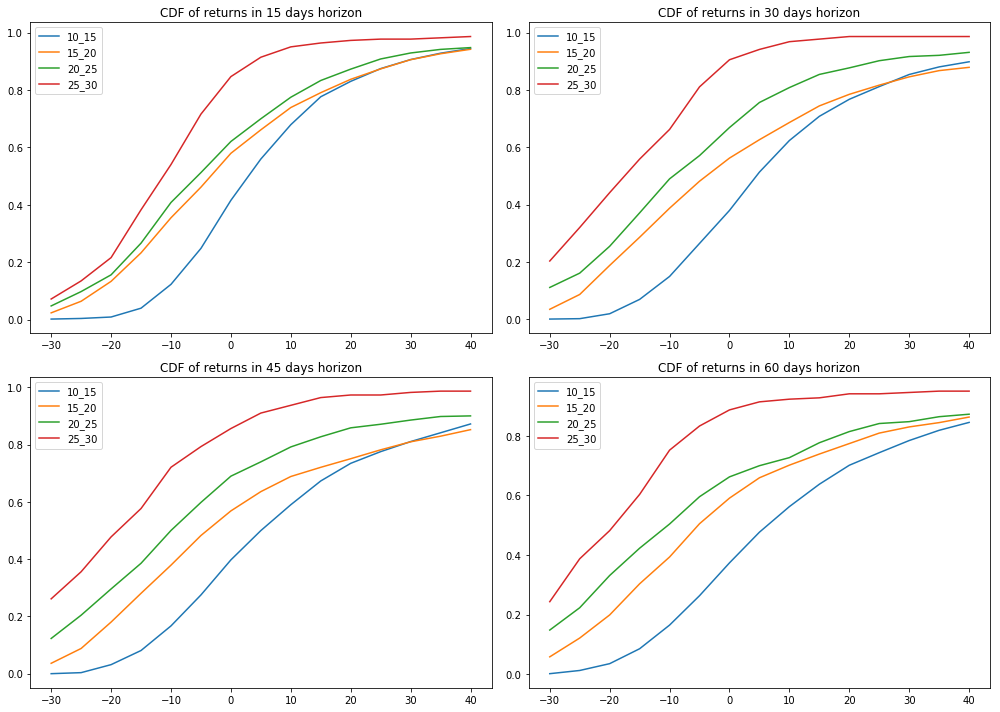

In [13]:
# plot out
figsize(14,10)
for i in range(len(hors)):
    subplot(2, 2, i + 1)
    plot_cdf_hor(dfd[i], hors[i])
tight_layout()

## Expected payoff of plain vanilla options

To be contnued ...

## Appendix

Here we present distribution of VIX values among shorter intervals, just for information.

### Interval length 2

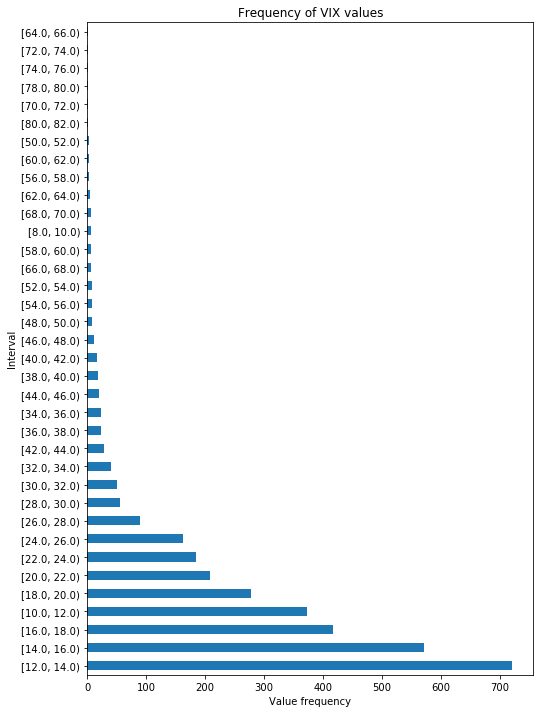

In [14]:
figsize(8,12)
show_freq(int_len=2)